<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/Machine_Learning_|_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

### Hypothesis


$h_\theta(x) = \theta^Tx = \theta_0  + \theta_1x_1 + ...$

In [0]:
def predict(X, theta):
  X = pd.DataFrame(X)
  X.insert(loc=0, column='x0', value=1)
  y_predicted = np.matmul(X, theta)
  return y_predicted

### Cost Function

$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$

##### *Vectorized form* 

$J(\theta) = \frac{1}{2m}(X\theta - \overrightarrow{y})^T(X\theta - \overrightarrow{y})$

##### *Implementation* 
Below compute_cost function implements a vectorized form of cost function. As vector of X is represented as a matrix with one observation in one row and columns representing the parameters. Below function adds a dummy parameter $x_0$ so that matrix multiplication can be performed with $\theta$ vector with parameters ${\theta_0, \theta_1, ...}$

In [0]:
import numpy as np

def compute_cost(X, y, theta):
  m=len(y)
  xt = np.matmul(X.values, theta)
  e = xt-y.values
  J_theta = (1/(2*m))*np.matmul(np.transpose(e), e)
  return J_theta

### Gradient Decent

$\theta_j := \theta_j - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $

##### *Vectorized form* 

$\theta_j := \theta_j - \frac{\alpha}{m}X^T(X\theta - \overrightarrow{y})$

In [0]:
def gradient_decent(X, y, theta, aplha, num_iter):
  m=len(y)
  J_theta_hist = np.array(np.zeros((num_iter)))
  X = pd.DataFrame(X)
  X.insert(loc=0, column='x0', value=1)
  for i in range(0, num_iter):
    xt = np.matmul(X.values, theta)
    e = xt-y.values
    theta = theta - (aplha/m)*np.matmul(np.transpose(X.values), e)
    J_theta_hist[i] = compute_cost(X, y, theta)
  return theta, J_theta_hist

## Single variable - Predicting Profit

This dataset is an example for single variable linear regression. It has two fields, population and profit. In this below implementation, we will be constructing a Linear regression model to redict profit based on population. 

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
import pandas as pd
data = pd.read_csv(r'/content/gdrive/My Drive/Coursera/Machine Learning/ex1data1.txt',
                  header=None)
data.columns = ['population', 'profit']
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


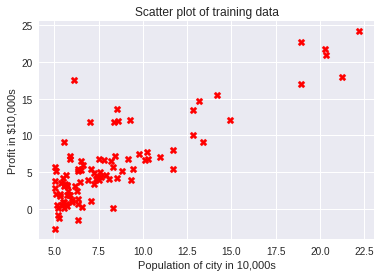

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data['population'], data['profit'], c='r', marker='X')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot of training data");

#### Finding Cost



In [91]:
X = data['population']
X = pd.DataFrame(X)
X.insert(loc=0, column='x0', value=1)
y = data['profit']
theta = np.array(np.zeros(2))
print(compute_cost(X, y, theta))

32.072733877455676


#### Optimising theta

In [92]:
aplha = 0.01
num_iter = 2000
X = data['population']
y = data['profit']
theta = np.array(np.zeros(2))
optimised_theta, J_theta_hist = gradient_decent(X, y, theta, aplha, num_iter)
print(optimised_theta)

[-3.78806857  1.18221277]


#### Predicting for new cities

In [93]:
print("Predicted profit for a city with population 35,000 is {}".format(predict([3.5], optimised_theta)*10000))
print("Predicted profit for a city with population 70,000 is {}".format(predict([7], optimised_theta)*10000))

Predicted profit for a city with population 35,000 is [3496.76138928]
Predicted profit for a city with population 70,000 is [44874.20850579]


#### Cost vs Number of iterations

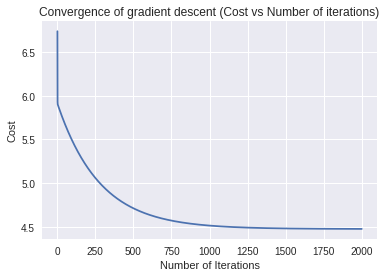

In [94]:
plt.plot(range(1,num_iter+1), J_theta_hist)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent (Cost vs Number of iterations)");

#### Plotting Linear Regression function

Object `plo` not found.


TypeError: ignored

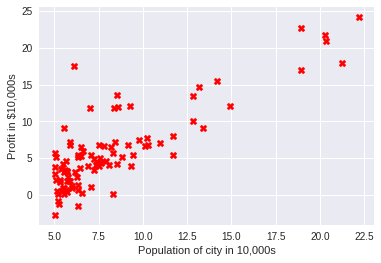

In [95]:
plt.scatter(data['population'], data['profit'], c='r', marker='X')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plo?
plt.plot(X.values, predict(X)/10000, '-');

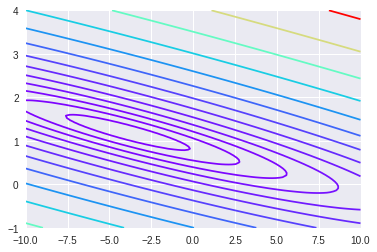

In [12]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)
J_val = np.array(np.zeros((len(theta0), len(theta1))))
X = data['population']
X = pd.DataFrame(X)
X.insert(loc=0, column='x0', value=1)
y = data['profit']

for i in range(0, len(theta0)):
  for j in range(0, len(theta1)):
    t = np.array([theta0[i], theta1[j]])
    J_val[i,j] = compute_cost(X, y, t)
    
#We need to ranspose the values because of the way contor plots work
J_val = np.transpose(J_val)
plt.contour(theta0, theta1, J_val, np.logspace(-2, 3, 30), cmap='rainbow');

#### Impact of changing Learning Rate

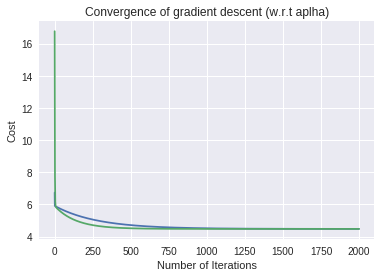

In [13]:
aplha = 0.01
num_iter = 2000
X = data['population']
y = data['profit']
theta = np.array(np.zeros(2))
_, J1 = gradient_decent(X, y, theta, aplha, num_iter)
aplha = 0.02
X = data['population']
theta = np.array(np.zeros(2))
_, J2 = gradient_decent(X, y, theta, aplha, num_iter)
plt.plot(range(1,num_iter+1), J1)
plt.plot(range(1,num_iter+1), J2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent (w.r.t aplha)");

## Multi Variable Linear Regression

In [14]:
import pandas as pd
datam = pd.read_csv(r'/content/gdrive/My Drive/Coursera/Machine Learning/ex1data2.txt',
                  header=None)
datam.columns = ['size', 'bedrooms', 'price']
datam.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Normalizing Data

From the data, its evident that each column has different range of data and data ranges vary a lot from column to column. Hence in order to reduce the impact of huge numbers (square feet) on the small numbers like bedrooms, we need to scale the data. 

We an use z-normalization in which we scale the data such that mean of the entire column becomes zero by using below formula for each value

$x_i^{'} = \frac{x_i- \mu}{\sigma}$

This can be done using sklearns preprocessing method.

In [75]:
aplha = 0.02
num_iter = 400
X = datam.drop(columns=['price'])
X_norm = preprocessing.scale(X)
y = datam['price']
theta = np.array(np.zeros(X_norm.shape[1]+1))
optimised_theta, J_theta_hist = gradient_decent(X_norm, y, theta, aplha, num_iter)
print(optimised_theta)

[340307.35772969 107757.47433209  -4888.35338493]


In [78]:
X=np.array([[1650.0, 3.0]])
X_norm = preprocessing.scale(X)
print("Predicted house price for a house with size 1650 sq.ft and 3 bedroom is {}".format(predict(X_norm, optimised_theta)[0]))

Predicted house price for a house with size 1650 sq.ft and 3 bedroom is 340307.3577296875


##Normal Equation

All the above tasks of feature scaling, gradient descent etc to find theta can be done in one equation shown below

$\theta = (X^TX)^{-1}X^T\overrightarrow{y}$

In [83]:
X = datam.drop(columns=['price'])
y = datam['price']
X.insert(loc=0, column='x0', value=1)
Xt = np.transpose(X)
normal_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt), y.values)
normal_theta

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [84]:
X=np.array([[1650.0, 3.0]])
print("Predicted house price for a house with size 1650 sq.ft and 3 bedroom is {}".format(predict(X, normal_theta)[0]))

Predicted house price for a house with size 1650 sq.ft and 3 bedroom is 293081.4643348959
